In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [4]:
%matplotlib inline

In [6]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/asthma_disease_data.csv')

In [8]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [10]:
# to check for missing values 
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [12]:
# to check for any duplicated values
duplicates = df[df.duplicated()]

In [14]:
# there are no duplicated values
duplicates

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge


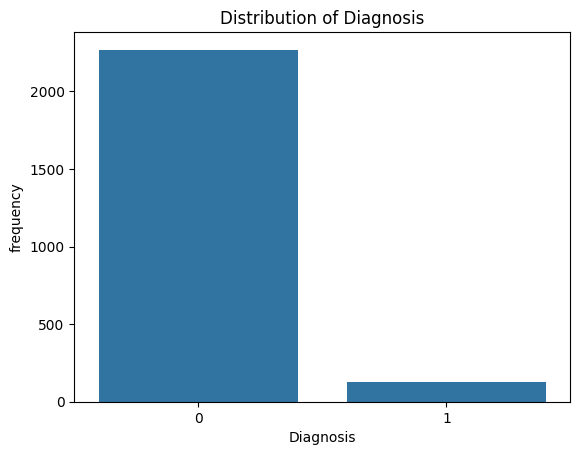

In [16]:
# to visualise the distribution of target variable
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.ylabel('frequency');
plt.show()

In [18]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [20]:
# 5% of the sample population is diagnosed with Asthma
100 *(df['Diagnosis'].value_counts()/len(df))

Diagnosis
0    94.816054
1     5.183946
Name: count, dtype: float64

In [22]:
df['EducationLevel'].unique()

array([0, 2, 1, 3], dtype=int64)

In [24]:
df['EducationLevel'] = df['EducationLevel'].map({0:'None', 1:'High_School', 2:'Bachelors', 3:'Higher_edu'})

In [26]:
df['EducationLevel'].unique()

array(['None', 'Bachelors', 'High_School', 'Higher_edu'], dtype=object)

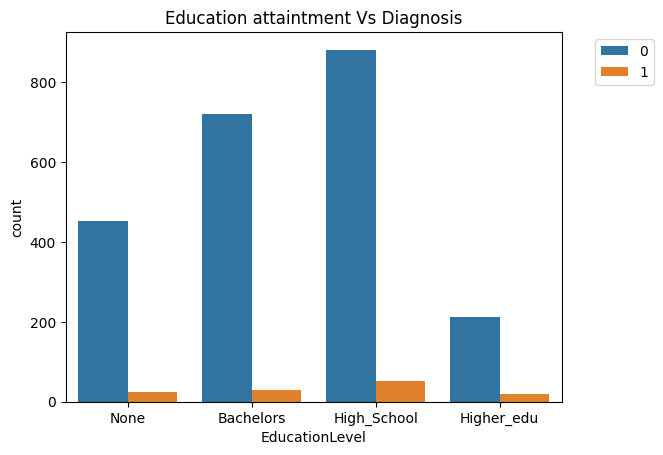

In [28]:
# people in with high school education are more likely to get asthma
sns.countplot(data=df, x= 'EducationLevel', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Education attaintment Vs Diagnosis')
plt.show()

In [30]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [32]:
df['Gender'] = df['Gender'].map({0:'Male', 1:'Female'})

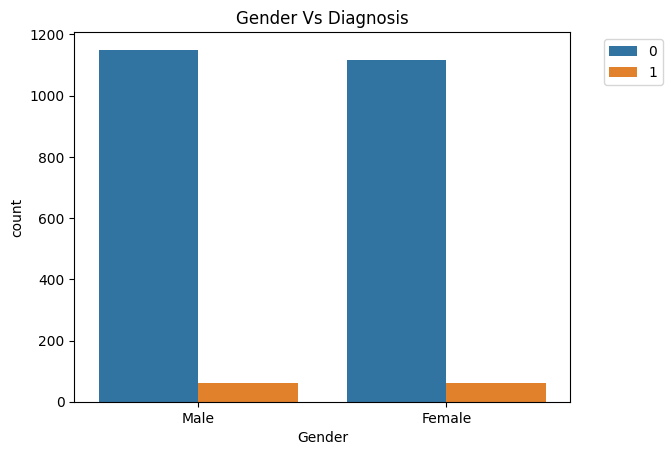

In [45]:
# Both male and females are likely to suffer attacks
sns.countplot(data=df, x='Gender', hue ='Diagnosis')
plt.title('Gender Vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.show()

In [34]:
pd.DataFrame(df.groupby(['Gender','Diagnosis'])['Diagnosis'].count())

Diagnosis
Gender Diagnosis           
Female 0               1118
       1                 62
Male   0               1150
       1                 62

In [36]:
df['Ethnicity'].unique()

array([1, 2, 0, 3], dtype=int64)

In [38]:
df['Ethnicity'] = df['Ethnicity'].map({0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'})

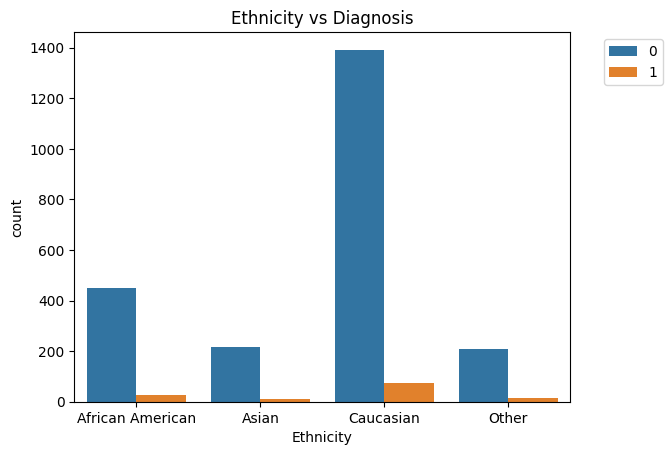

In [40]:
# Caucasians are more likely to suffer from Asthma attacks
sns.countplot(data=df, x='Ethnicity', hue='Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Ethnicity vs Diagnosis')
plt.show()

In [42]:
# to remove unimportant variables not useful for analysis
df = df.drop(['PatientID','DoctorInCharge'], axis=1)

In [44]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,Male,African American,None,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,Female,Asian,Bachelors,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,Male,Asian,High_School,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,Female,Asian,High_School,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,Male,Caucasian,Higher_edu,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0


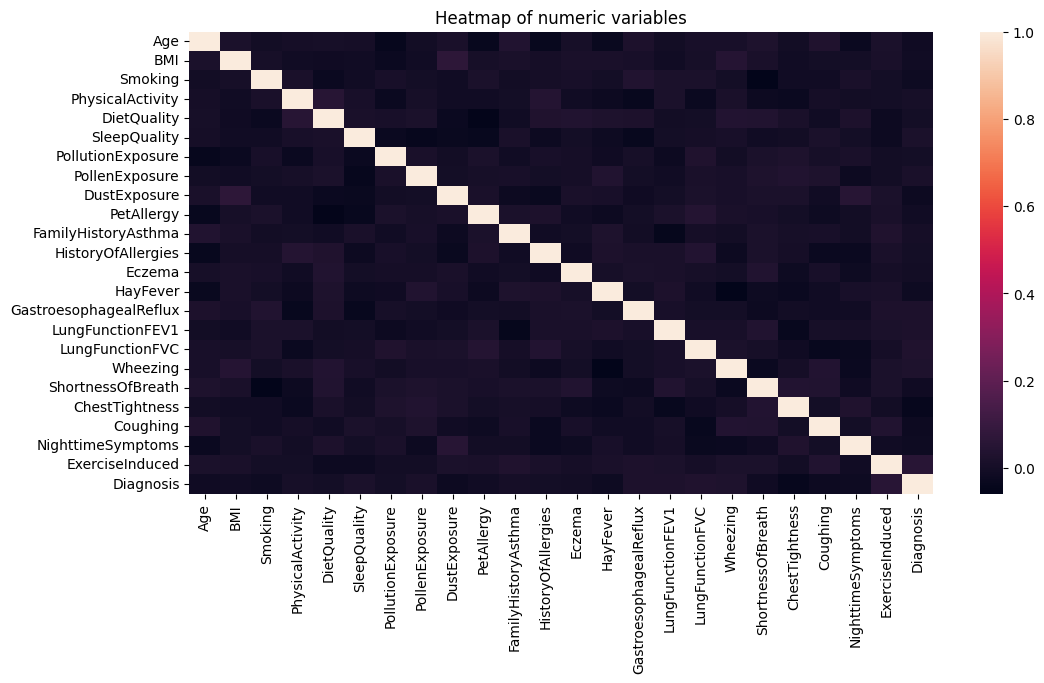

In [46]:
# to visualise correlation of all numeric values in a heatmap
plt.figure(figsize=(12,6), dpi=100)
sns.heatmap(data= df.select_dtypes(['int','float']).corr())
plt.title('Heatmap of numeric variables')
plt.show()

In [48]:
df.select_dtypes(['int','float']).columns

Index(['Age', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure',
       'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema',
       'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1',
       'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness',
       'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'],
      dtype='object')

In [50]:
df['Age'].describe()

count    2392.000000
mean       42.137960
std        21.606655
min         5.000000
25%        23.000000
50%        42.000000
75%        61.000000
max        79.000000
Name: Age, dtype: float64

In [54]:
# youngest = 5
# oldest = 79
def age_categories(z):
    if 5 <= z <= 20:
        return "5 to 20"
    elif 21 <= z <= 35:
        return "21 to 35"
    elif 36 <= z <= 50:
        return "36 to 50"
    elif 51 <= z <= 65:
        return "51 to 65"
    elif 66 <= z <= 76:
        return "66 to 76"
    elif z >= 77:
        return "above 77"

In [56]:
# to create new variable by applying custom function, .apply()
df['age_categories'] = df['Age'].apply(age_categories)

In [58]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,age_categories
0,63,Male,African American,None,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,1.369051,4.941206,0,0,1,0,0,1,0,51 to 65
1,26,Female,Asian,Bachelors,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,2.197767,1.702393,1,0,0,1,1,1,0,21 to 35
2,57,Male,Asian,High_School,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1.698011,5.022553,1,1,1,0,1,1,0,51 to 65
3,40,Female,Asian,High_School,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,3.032037,2.300159,1,0,1,1,1,0,0,36 to 50
4,61,Male,Caucasian,Higher_edu,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,3.470589,3.067944,1,1,1,0,0,1,0,51 to 65


In [60]:
df['age_categories'].unique()

array(['51 to 65', '21 to 35', '36 to 50', '5 to 20', '66 to 76',
       'above 77'], dtype=object)

In [62]:
age_categories_order = ['5 to 20',
                        '21 to 35',
                       '36 to 50',
                       '51 to 65',
                       '66 to 76',
                       'above 77']

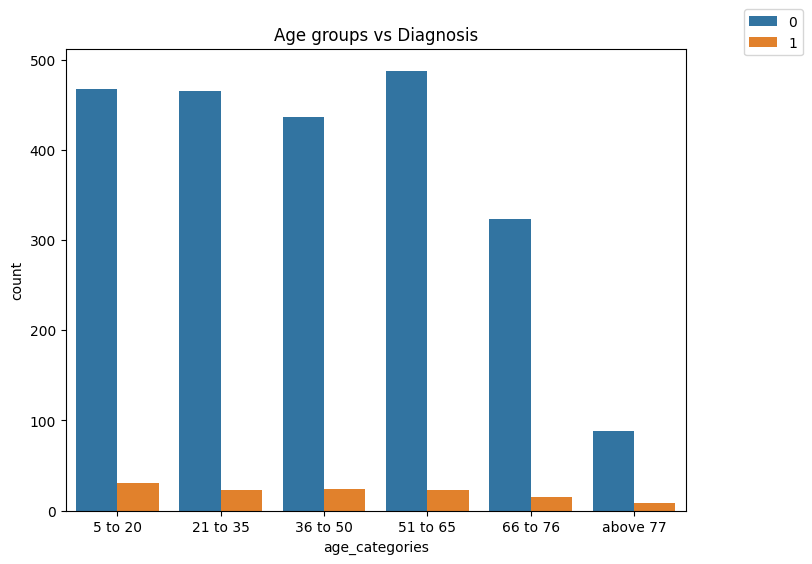

In [64]:
plt.figure(figsize=(8,6),dpi=100)
sns.countplot(data=df, x='age_categories', hue='Diagnosis', order=age_categories_order)
plt.title('Age groups vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

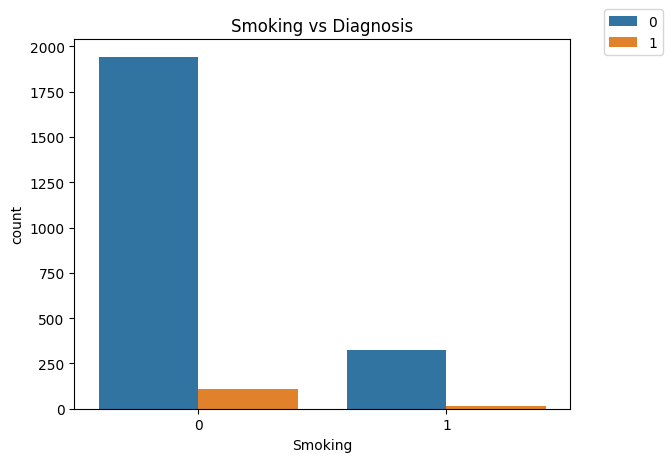

In [66]:
sns.countplot(data=df, x='Smoking', hue='Diagnosis')
plt.title('Smoking vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

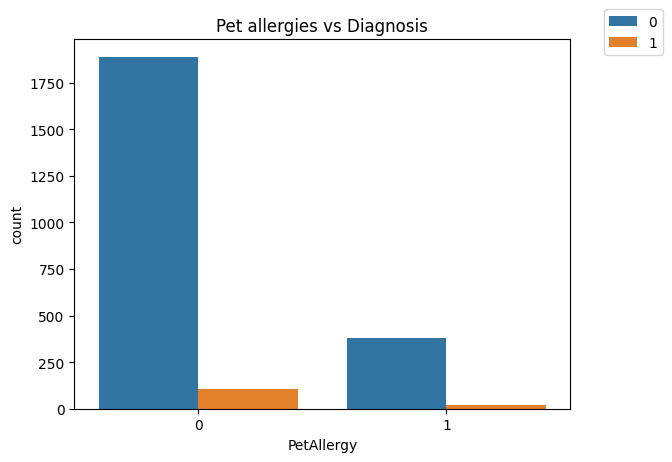

In [68]:
sns.countplot(data=df, x='PetAllergy', hue='Diagnosis')
plt.title('Pet allergies vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

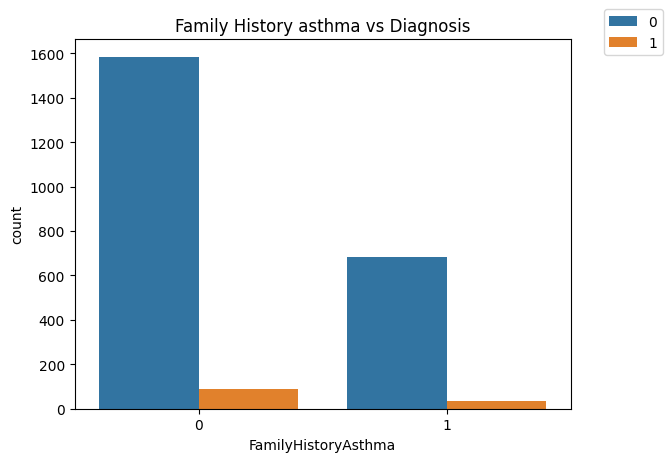

In [70]:
sns.countplot(data=df, x='FamilyHistoryAsthma', hue='Diagnosis')
plt.title('Family History asthma vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

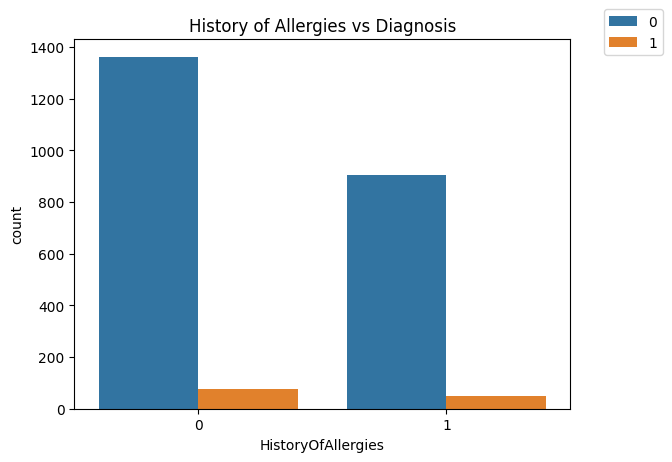

In [72]:
sns.countplot(data=df, x='HistoryOfAllergies', hue='Diagnosis')
plt.title('History of Allergies vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

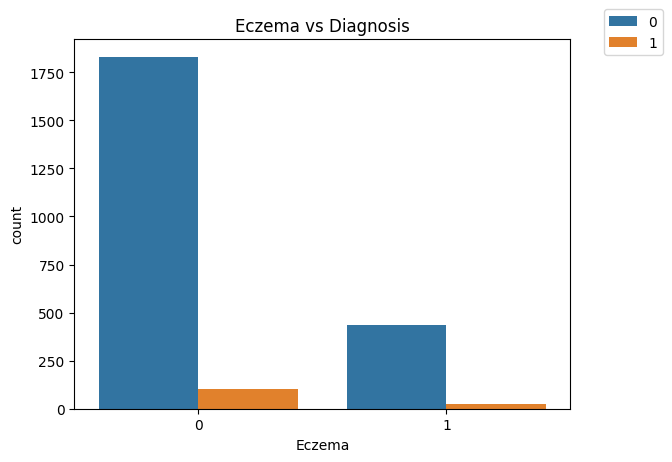

In [74]:
sns.countplot(data=df, x='Eczema', hue='Diagnosis')
plt.title('Eczema vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

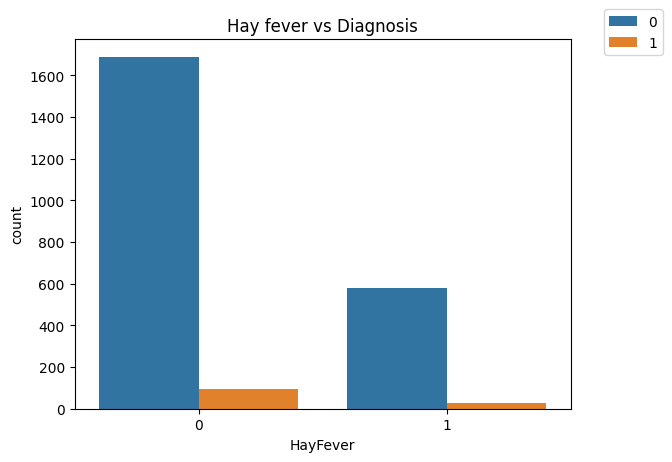

In [76]:
sns.countplot(data=df, x='HayFever', hue='Diagnosis')
plt.title('Hay fever vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

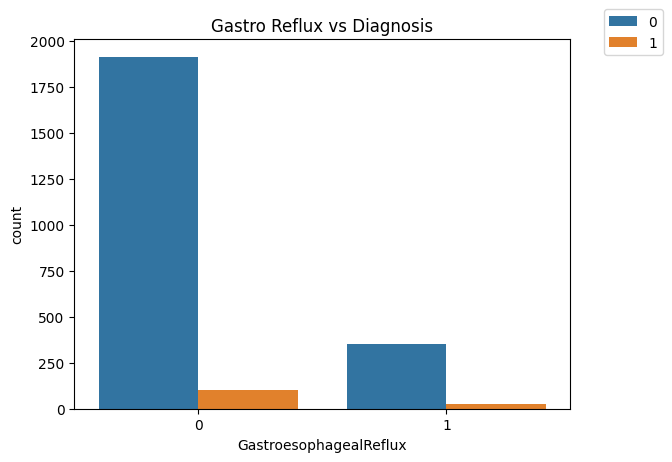

In [78]:
sns.countplot(data=df, x='GastroesophagealReflux', hue='Diagnosis')
plt.title('Gastro Reflux vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

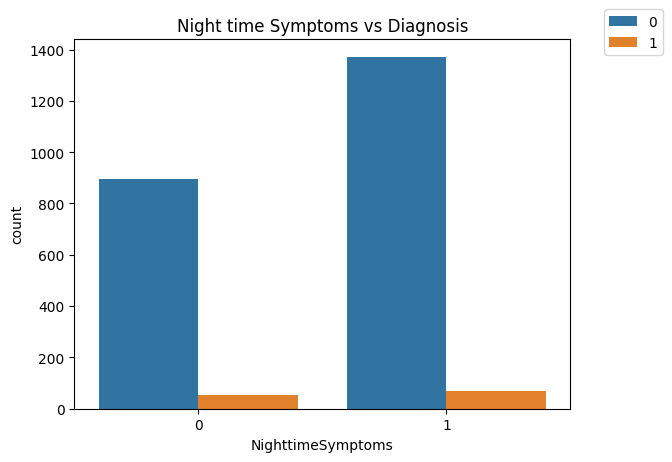

In [80]:
sns.countplot(data=df, x='NighttimeSymptoms', hue='Diagnosis')
plt.title('Night time Symptoms vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

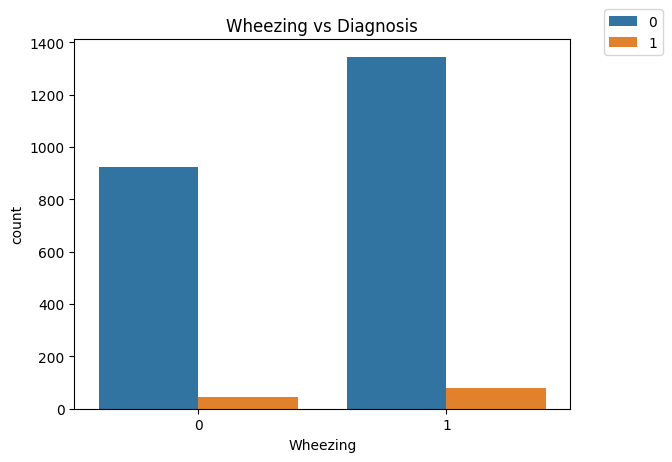

In [82]:
sns.countplot(data=df, x='Wheezing', hue='Diagnosis')
plt.title('Wheezing vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

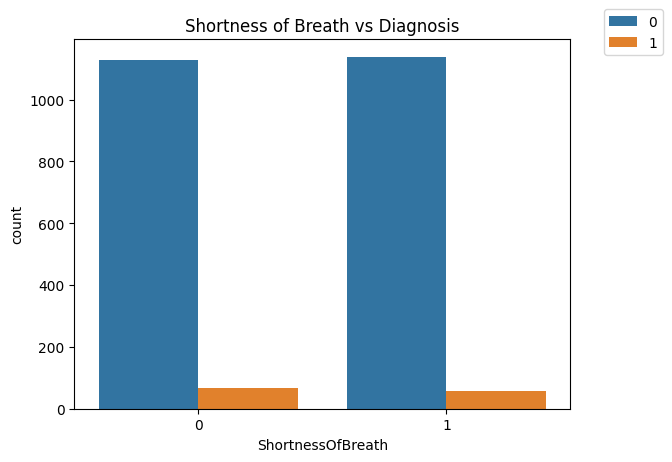

In [84]:
sns.countplot(data=df, x='ShortnessOfBreath', hue='Diagnosis')
plt.title('Shortness of Breath vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

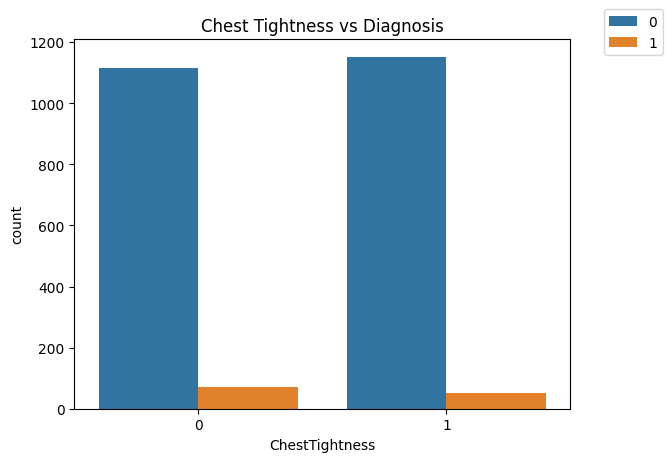

In [86]:
sns.countplot(data=df, x='ChestTightness', hue='Diagnosis')
plt.title('Chest Tightness vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

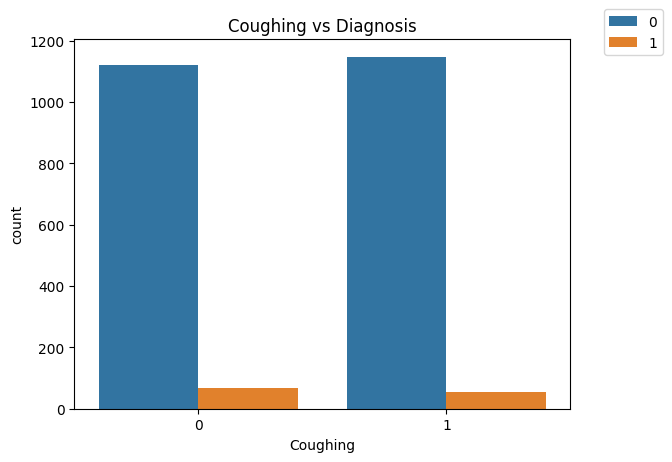

In [88]:
sns.countplot(data=df, x='Coughing', hue='Diagnosis')
plt.title('Coughing vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

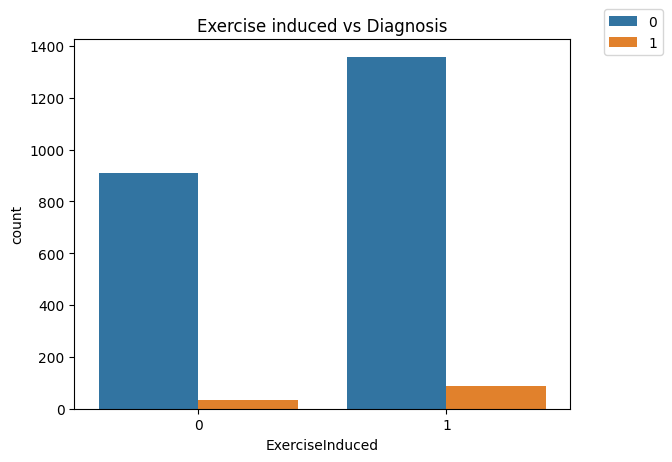

In [90]:
sns.countplot(data=df, x='ExerciseInduced', hue='Diagnosis')
plt.title('Exercise induced vs Diagnosis')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.show()

In [92]:
# to see correlation of all numeric variable against target variable 'Diagnosis'
df.select_dtypes(['int','float']).corr()['Diagnosis'].sort_values(ascending=False)

Diagnosis                 1.000000
ExerciseInduced           0.053956
LungFunctionFVC           0.029629
Wheezing                  0.027197
LungFunctionFEV1          0.023336
GastroesophagealReflux    0.022770
SleepQuality              0.018022
PollenExposure            0.015099
PhysicalActivity          0.005066
FamilyHistoryAsthma      -0.001334
HistoryOfAllergies       -0.001951
DietQuality              -0.003149
PollutionExposure        -0.004535
Eczema                   -0.008592
BMI                      -0.012522
PetAllergy               -0.013078
Age                      -0.015111
ShortnessOfBreath        -0.015281
HayFever                 -0.019141
Smoking                  -0.019321
NighttimeSymptoms        -0.021965
Coughing                 -0.024193
DustExposure             -0.025972
ChestTightness           -0.039278
Name: Diagnosis, dtype: float64

In [94]:
# to define X and y
X = df.drop('Diagnosis', axis=1)

In [96]:
# to convert categorical variable into dummy variable, drop_first = True to remove multi-collinearity
X = pd.get_dummies(X, drop_first = True)

In [98]:
y = df['Diagnosis']

In [100]:
from sklearn.model_selection import train_test_split

In [102]:
# to make the dataset into equivalent scale
from sklearn.preprocessing import StandardScaler

In [104]:
# to assign 20% as testing set, 80% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 101)

In [106]:
# to scale the dataset
scaler = StandardScaler()

In [108]:
scaled_X_train = scaler.fit_transform(X_train)

In [110]:
# to transform on the X testing data
scaled_X_test = scaler.transform(X_test)

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [116]:
from xgboost import XGBClassifier

In [118]:
from sklearn.model_selection import GridSearchCV

In [120]:
from sklearn.svm import SVC

In [122]:
# to import KNN machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier

In [124]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, recall_score, classification_report

In [1]:
# help(DecisionTreeClassifier)

In [126]:
dt = DecisionTreeClassifier()

In [128]:
# to define the decision tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [130]:
# Set up GridSearchCV
dt_clf = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [132]:
# Fit GridSearchCV
dt_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [134]:
# Best parameters and score
print("Best parameters found: ", dt_clf.best_params_)
print("Best score found: ", dt_clf.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score found:  0.9336131122442005


In [136]:
# AUC score for Decision Treet test prediction model = 0.495
best_model = dt_clf.best_estimator_
dt_test_pred = best_model.predict(scaled_X_test)
print("DT test AUC score: ", roc_auc_score(y_test, dt_test_pred))

DT test AUC score:  0.49557522123893805


In [138]:
best_model = dt_clf.best_estimator_
dt_train_pred = best_model.predict(scaled_X_train)
print("DT train AUC score: ", roc_auc_score(y_train, dt_train_pred))

DT train AUC score:  0.5751169444570597


In [140]:
print(classification_report(y_test,dt_test_pred)) # decision tree classifier

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.48       479
weighted avg       0.89      0.94      0.91       479



In [142]:
rf = RandomForestClassifier()

In [144]:
# Define parameter grid (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [146]:
# Set up GridSearchCV
rf_clf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [148]:
# to convert y_train from 'int' to float64 datatype
y_train = y_train.astype(np.float64)

In [150]:
scaled_X_train.dtype

dtype('float64')

In [152]:
# Fit GridSearchCV
rf_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [154]:
# Best parameters and score
print("Best parameters found: ", rf_clf.best_params_)
print("Best score found: ", rf_clf.best_score_)

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  0.9492953125640782


In [156]:
# AUC score for Random Forest test prediction model = 0.5
best_model = rf_clf.best_estimator_
rf_test_pred = best_model.predict(scaled_X_test)
print("RF test AUC score: ", roc_auc_score(y_test, rf_test_pred))

RF test AUC score:  0.5


In [158]:
best_model = rf_clf.best_estimator_
rf_train_pred = best_model.predict(scaled_X_train)
print("RF test AUC score: ", roc_auc_score(y_train, rf_train_pred))

RF test AUC score:  1.0


In [160]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [162]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier()

In [3]:
# help(AdaBoostClassifier)

In [164]:
# Define the parameter grid, Ada Boost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME']
}

In [166]:
# Initialize GridSearchCV with 5-fold cross-validation
ada_clf = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [168]:
# Fit the model on the training data
ada_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [170]:
# Print the best parameters and best score
print("Best Parameters:", ada_clf.best_params_)
print("Best Cross-Validation Accuracy:", ada_clf.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9492953125640782


In [172]:
# AUC score for AdaBoost test model = 0.5
best_model = ada_clf.best_estimator_
ada_test_pred = best_model.predict(scaled_X_test)
print("AdaBoost test AUC score: ", roc_auc_score(y_test, ada_test_pred))

AdaBoost test AUC score:  0.5


In [174]:
best_model = ada_clf.best_estimator_
ada_train_pred = best_model.predict(scaled_X_train)
print("AdaBoost train AUC score: ", roc_auc_score(y_train, ada_train_pred))

AdaBoost train AUC score:  0.5


In [176]:
print(classification_report(y_test, ada_test_pred))   # AdaBoost classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
# help(GradientBoostingClassifier)

In [178]:
# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier()

In [180]:
# Define the parameter grid, Gradient Boost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [182]:
# Initialize GridSearchCV with 5-fold cross-validation
gbc_clf = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [184]:
# Fit the model on the training data
gbc_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [186]:
# Print the Gradient Boost best parameters and best score
print("Best Parameters:", gbc_clf.best_params_)
print("Best Cross-Validation Accuracy:", gbc_clf.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9492953125640782


In [188]:
# AUC score for Gradient Boost classifier test set = 0.5
best_model = gbc_clf.best_estimator_
gbc_test_pred = best_model.predict(scaled_X_test)
print("Gradient Boost classifier:", roc_auc_score(y_test, gbc_test_pred))

Gradient Boost classifier: 0.5


In [190]:
best_model = gbc_clf.best_estimator_
gbc_train_pred = best_model.predict(scaled_X_train)
print("Gradient Boost classifier:", roc_auc_score(y_train, gbc_train_pred))

Gradient Boost classifier: 0.5


In [192]:
print(classification_report(y_test, gbc_test_pred)) # Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [200]:
# Initialize the XGBoost classifier
xgb = XGBClassifier()

In [202]:
# Define the parameter grid, XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [204]:
# Initialize GridSearchCV with 5-fold cross-validation
xgb_clf = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [206]:
# Fit the model on the training data
xgb_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [208]:
# Print the best parameters and best score
print("Best Parameters:", xgb_clf.best_params_)
print("Best Cross-Validation Accuracy:", xgb_clf.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9498188727735022


In [212]:
# AUC score for XGBoost classifier test score = 0.5
best_model = xgb_clf.best_estimator_
xgb_test_pred = best_model.predict(scaled_X_test)
print("XGBoost classifier AUC test score: ", roc_auc_score(y_test, xgb_test_pred))

XGBoost classifier AUC test score:  0.5


In [214]:
best_model = xgb_clf.best_estimator_
xgb_train_pred = best_model.predict(scaled_X_train)
print("XGBoost classifier AUC train score: ", roc_auc_score(y_train, xgb_train_pred))

XGBoost classifier AUC train score:  0.5


In [218]:
print(classification_report(y_test, xgb_test_pred))   # XGBoost classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [228]:
# Initialize the Support Vector Classifier
svc = SVC()

In [230]:
# Define the parameter grid, Support Vector
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']    # Kernel type
}

In [232]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
svc_clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [234]:
# Fit the grid search to the data
svc_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [241]:
# Print the best parameters and best score
print("Best Parameters:", svc_clf.best_params_)
print("Best Cross-Validation Accuracy:", svc_clf.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9492953125640782


In [243]:
# AUC score for Support Vector classifier test score = 0.5
best_model = svc_clf.best_estimator_
svc_test_pred = best_model.predict(scaled_X_test)
print("Support Vector classifier AUC test score: ", roc_auc_score(y_test, svc_test_pred))

Support Vector classifier AUC test score:  0.5


In [245]:
best_model = svc_clf.best_estimator_
svc_train_pred = best_model.predict(scaled_X_train)
print("Support Vector classifier AUC test score: ", roc_auc_score(y_train, svc_train_pred))

Support Vector classifier AUC test score:  0.5


In [247]:
print(classification_report(y_test, svc_test_pred))  # Support Vector Classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [251]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [253]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

In [255]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [257]:
# Fit the grid search to the data
knn_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [259]:
# Print the best parameters and best score
print("Best Parameters:", knn_clf.best_params_)
print("Best Cross-Validation Accuracy:", knn_clf.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9492953125640782


In [264]:
# AUC score for K Nearest neighbor test score = 0.5
best_model = knn_clf.best_estimator_
knn_test_pred = best_model.predict(scaled_X_test)
print("KNN classifier AUC test score: ", roc_auc_score(y_test, knn_test_pred))

KNN classifier AUC test score:  0.5


In [266]:
best_model = knn_clf.best_estimator_
knn_train_pred = best_model.predict(scaled_X_train)
print("KNN classifier AUC train score: ", roc_auc_score(y_train, knn_train_pred))

KNN classifier AUC train score:  0.5


In [275]:
print(classification_report(y_test, knn_test_pred))  # KNN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [279]:
from sklearn.linear_model import LogisticRegression

In [281]:
# to create an instance of Logistic Regression
lr = LogisticRegression()

In [283]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength (to prevent over-fitting)
    'max_iter': [100,150]  # Maximum number of iterations
}

In [285]:
lr_clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [287]:
# Fit the grid search to the data, logistic regression
lr_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 150]},
             verbose=2)

In [296]:
# Print the best parameters and best score
print("Best Parameters:", lr_clf.best_params_)
print("Best Cross-Validation Accuracy:", lr_clf.best_score_)

Best Parameters: {'C': 0.01, 'max_iter': 100}
Best Cross-Validation Accuracy: 0.9492953125640782


In [302]:
# AUC score for Logistic Regression test score = 0.5
best_model = lr_clf.best_estimator_
lr_test_pred = best_model.predict(scaled_X_test)
print("Logistic Regression classifier AUC test score: ", roc_auc_score(y_test, lr_test_pred))

Logistic Regression classifier AUC test score:  0.5


In [304]:
best_model = lr_clf.best_estimator_
lr_train_pred = best_model.predict(scaled_X_train)
print("XGBoost classifier AUC train score: ", roc_auc_score(y_train, lr_train_pred))

XGBoost classifier AUC train score:  0.5


In [306]:
print(classification_report(y_test, lr_test_pred))  # Logistic Regression

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       452
           1       0.00      0.00      0.00        27

    accuracy                           0.94       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.89      0.94      0.92       479



C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [395]:
best_model = xgb_clf.best_estimator_

In [397]:
xgb_feature_importances = best_model.feature_importances_

In [399]:
# to print XGBoost classifier feature importances
xgb_feature_importances 

array([0.03143068, 0.03253703, 0.03272082, 0.03703718, 0.03292502,
       0.02902429, 0.03882277, 0.03459378, 0.03852608, 0.02158464,
       0.02997053, 0.02375809, 0.02505715, 0.0242886 , 0.03934053,
       0.03305633, 0.03080114, 0.04062558, 0.02548391, 0.04018804,
       0.04130496, 0.03336271, 0.0331213 , 0.        , 0.01814518,
       0.02817193, 0.07645477, 0.02809215, 0.02526175, 0.        ,
       0.03529795, 0.        , 0.0390151 , 0.        , 0.        ],
      dtype=float32)

In [401]:
pd.DataFrame(data= xgb_feature_importances , index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
Ethnicity_Other,0.076455
Coughing,0.041305
Wheezing,0.040626
ChestTightness,0.040188
GastroesophagealReflux,0.039341
age_categories_51 to 65,0.039015
PollutionExposure,0.038823
DustExposure,0.038526
PhysicalActivity,0.037037
age_categories_36 to 50,0.035298


In [403]:
# to read into a new dataframe
xgb_imp = pd.DataFrame(data= xgb_feature_importances , index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [405]:
# to filter out insignificiant variables
xgb_imp = xgb_imp[xgb_imp['Importance'] > 0]

In [407]:
xgb_imp

,Importance
Ethnicity_Other,0.076455
Coughing,0.041305
Wheezing,0.040626
ChestTightness,0.040188
GastroesophagealReflux,0.039341
age_categories_51 to 65,0.039015
PollutionExposure,0.038823
DustExposure,0.038526
PhysicalActivity,0.037037
age_categories_36 to 50,0.035298


C:\Users\miche\AppData\Local\Temp\ipykernel_20264\2510816617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp, y=xgb_imp.index, x='Importance', palette='rocket')


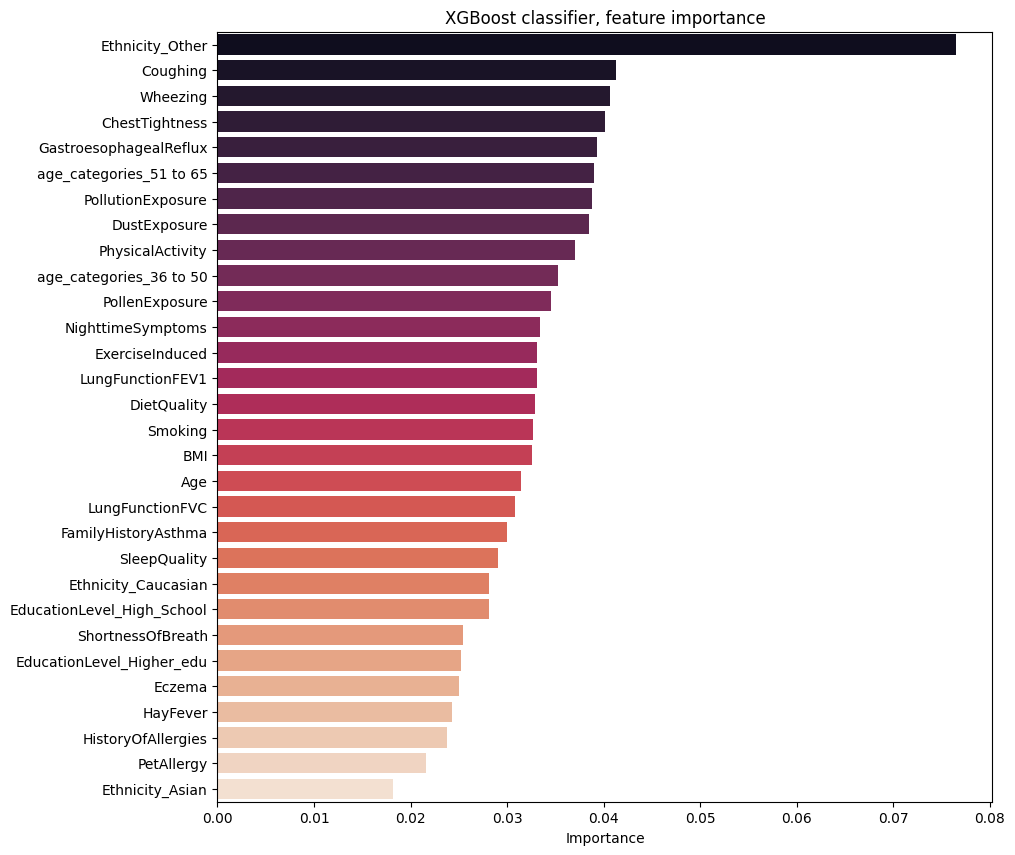

In [417]:
# Predictors of asthma: 1) Coughing, 2)Wheezing, 3)Chest Tightness, 4)Gastroesphageal Reflux
# to visualise in a barplot
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(data=xgb_imp, y=xgb_imp.index, x='Importance', palette='rocket')
plt.title("XGBoost classifier, feature importance")
plt.ylabel("")
plt.show()